In [247]:
#Import the libraries.
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [248]:
#read the data
data = pd.read_csv('BreastCancer.csv')

# Preprocessing

1. No missing value, but a unnamed column and useless feature: ID
2. Spliting the dataset into two.
3. In this case, we only dicussed the two column feature.(area mean and radius meam)

Q1-a

In [249]:
#Drop some cols
col = ['Unnamed: 32', 'id']
data = data.drop(col, 1)
data.isnull().any()

#Divide into feature table and target label.
x_ = data[['radius_mean', 'area_mean']]   #feature
lbl_ = data['diagnosis']   #target

Q1-b

In [250]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_lbl, test_lbl = train_test_split(x_, lbl_, test_size = 0.34, random_state = 5)

Q1-c

In [251]:
knn = KNeighborsClassifier(6)
knn.fit(train_x, train_lbl)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

Q1-d(Only acc)

In [252]:
from sklearn.metrics import accuracy_score
pred1 = knn.predict(test_x)
print('Accuracy: ', accuracy_score(test_lbl, pred1))

Accuracy:  0.9175257731958762


Q1-e

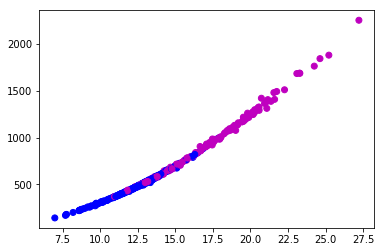

In [253]:
#visualize the training set distribution of diagnosis. x represent radius
plt.scatter(x = train_x['radius_mean'], y = train_x['area_mean'], c = train_lbl)

Q1-f

In [254]:
kmeans = KMeans(n_clusters = 2)

Q1-g

In [255]:
#fit the entire dataset and then do the prediction.
pred2 = kmeans.fit_predict(x_)

In [256]:
#Assessment the model
#Let's make an assumption here, assume that we could ONLY USE ACCURACY to be the criteria of discrimination ability.
#
def assessment(truth, pred):
    coded_lbl = truth.replace({'M':0, 'B':1})  #cuz not sure about kmeans transformed M or B into '1'
    acc1 = accuracy_score(coded_lbl, pred)
    coded_lbl = truth.replace({'M':1, 'B':0})
    acc2 = accuracy_score(coded_lbl, pred)
    return max(acc1, acc2)

print('Accuracy: ', assessment(lbl_, pred2))

Accuracy:  0.8383128295254832


Q1-h

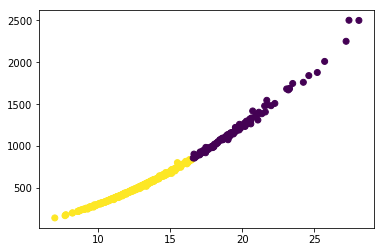

In [257]:
#visualize the training set distribution of diagnosis. x represent radius
plt.scatter(x = x_['radius_mean'], y = x_['area_mean'], c = pred2)

Q1-i

In [258]:
#get the outlier index array of the dataset
out = x_['area_mean'] > 2000 #4 instances
x_new = x_[~out]
lbl_new = lbl_[~out]

Q1-j(after eliminate the outlier)

In [259]:
#Some configuration before re-model
#I am not sure whether it is a best way to comapre two result
train_nx, test_nx, train_nlbl, test_nlbl = train_test_split(x_new, lbl_new, test_size = 0.34, random_state = 5)

#KNN
knn = KNeighborsClassifier(6)
knn.fit(train_nx, train_nlbl)
pred3 = knn.predict(test_nx)
print('Accuracy: ', accuracy_score(test_nlbl, pred3))

#KMeans
kmeans = KMeans(n_clusters = 2)
pred4 = kmeans.fit_predict(x_new)
print('Accuracy: ', assessment(lbl_new, pred4))

Accuracy:  0.8860103626943006
Accuracy:  0.8371681415929203


A LITTLE BUG between these comparison

'The origianl triaining set' is different from 'remove outlier training set', and so the training sets